In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
%cd gdrive/My\ Drive/KKB-kaggle/bengaliai-cv19/notebooks

/content/gdrive/My Drive/KKB-kaggle/bengaliai-cv19/notebooks


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset_dir = '../dataset'
train_df = pd.read_csv(dataset_dir + '/train.csv')
test_df = pd.read_csv(dataset_dir + '/test.csv')
class_map_df = pd.read_csv(dataset_dir + '/class_map.csv')
sample_sub_df = pd.read_csv(dataset_dir + '/sample_submission.csv')

In [40]:
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [41]:
test_df.head()

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root


In [42]:
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [43]:
sample_sub_df.head()

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0


In [44]:
# データの形状
print(f'Size of training data: {train_df.shape}')
print(f'Size of test data: {test_df.shape}')
print(f'Size of class map: {class_map_df.shape}')

Size of training data: (200840, 5)
Size of test data: (36, 3)
Size of class map: (186, 3)


In [56]:
# 各grapheme_root, consonant_diacritic, vowel_diacriticが何回出現しているのかを調べたい
# それぞれのgrapheme_root, consonant_diacritic, vowel_diacriticについての情報をまとめるDataFrameを作成する

root_df = class_map_df[class_map_df['component_type']=='grapheme_root']
print(f'Size: {root_df.shape}')
cons_df = class_map_df[class_map_df['component_type']=='consonant_diacritic'].reset_index(drop=True)
print(f'Size: {cons_df.shape}')
vowel_df = class_map_df[class_map_df['component_type']=='vowel_diacritic'].reset_index(drop=True)
print(f'Size: {vowel_df.shape}')

Size: (168, 3)
Size: (7, 3)
Size: (11, 3)


In [57]:
root_df.drop(columns=['component_type'], inplace=True)
cons_df.drop(columns=['component_type'], inplace=True)
vowel_df.drop(columns=['component_type'], inplace=True)
root_df['count'] = train_df.groupby(['grapheme_root']).size()
cons_df['count'] = train_df.groupby(['consonant_diacritic']).size()
vowel_df['count'] = train_df.groupby(['vowel_diacritic']).size()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
root_df

,label,component,count
0,0,ং,147
1,1,ঃ,145
2,2,অ,337
3,3,আ,318
4,4,ই,331
...,...,...,...
163,163,হ্ল,165
164,164,ৎ,164
165,165,ড়,1142
166,166,ঢ়,307


In [59]:
cons_df

,label,component,count
0,0,0,125278
1,1,ঁ,7424
2,2,র্,23465
3,3,র্য,619
4,4,্য,21270
5,5,্র,21397
6,6,্র্য,1387


In [60]:
vowel_df

,label,component,count
0,0,0,41508
1,1,া,36886
2,2,ি,25967
3,3,ী,16152
4,4,ু,18848
5,5,ূ,5297
6,6,ৃ,4336
7,7,ে,28723
8,8,ৈ,3528
9,9,ো,16032


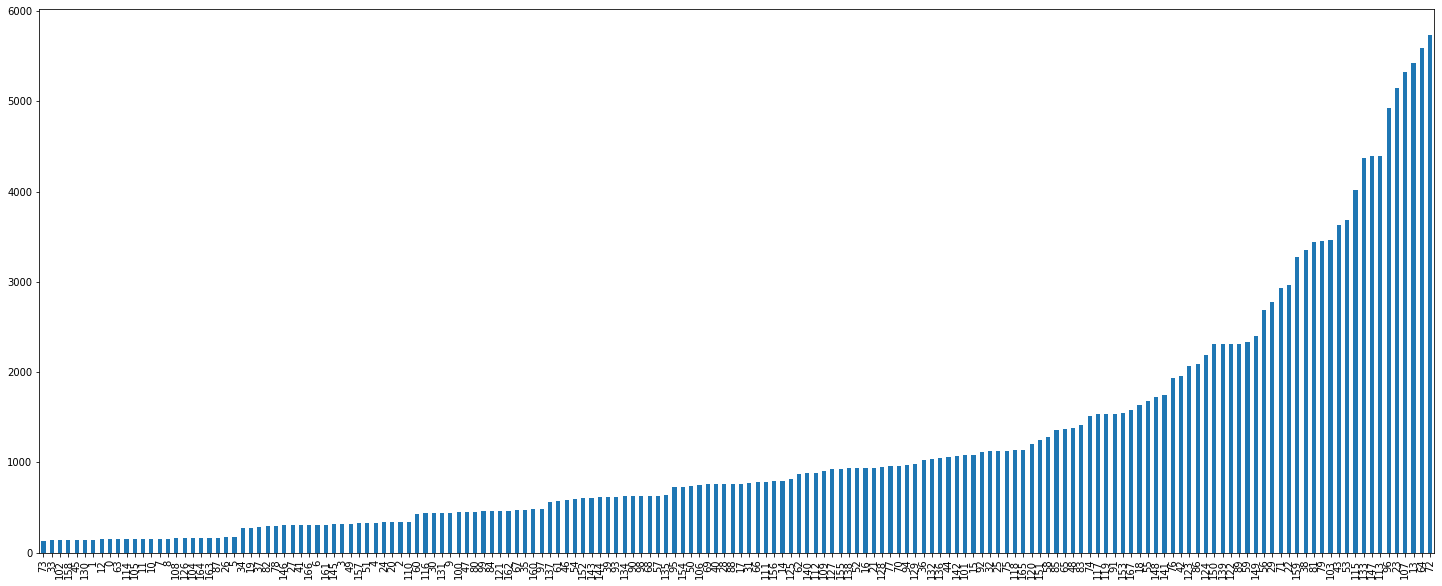

In [71]:
# 各grapheme_rootの出現数がどんな分布になっているか。昇順にsortしてグラフ表示
root_df.sort_values(by=['count'])['count'].plot(kind='bar', figsize=(25,10))